In [1]:
import ecg_preprocess as ep
import numpy as np
import scipy.io as sio
from sklearn import preprocessing
import os
import re
import random
import math

In [2]:
DATA_PATH = '/data/ECG/CPSC2019/train/data/'
REF_PATH = '/data/ECG/CPSC2019/train/ref/'

In [3]:
AUG_DATA_PATH = '/data/ECG/CPSC2019/aug_train/data/'
AUG_REF_PATH = '/data/ECG/CPSC2019/aug_train/ref/'

In [12]:
if not os.path.exists(AUG_DATA_PATH):
    os.makedirs(AUG_DATA_PATH)
if not os.path.exists(AUG_REF_PATH):
    os.makedirs(AUG_REF_PATH)

In [14]:
count = 0
for ref_file in os.listdir(REF_PATH):
    index = re.split('[_.]', ref_file)[1]
    print(index)
    
    ecg_file = 'data_' + index + '.mat'
    
    ref_path = os.path.join(REF_PATH, ref_file)
    ecg_path = os.path.join(DATA_PATH, ecg_file)
    
    ecg_data = sio.loadmat(ecg_path)['ecg'].squeeze()
    r_ref = sio.loadmat(ref_path)['R_peak'].squeeze()
    
    ecg = ep.pp(ecg_data)

    ecg_lp = ecg - ep.lowpass_filter(ecg, 0.05, 500)
    ecg_hp = ecg_lp - ep.highpass_filter(ecg_lp, 45, 500)

    ann_d = list(map(lambda x: int(round((x-1)/8)), r_ref))
    ann_target = np.zeros([625, ], dtype=np.int)

    ecg_period = preprocessing.minmax_scale(ecg_hp)

    for ann in ann_d:
        ann_target[ann-5: ann+5] += 1

    ann_target = ep.convert_to_one_hot(ann_target, 2)
    
    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_period)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1
    """
    adddb1_start = random.uniform(0, 7)
    delta_t = random.uniform(0, 3)
    amp = random.uniform(0.5, 1)
    ecg_add1 = ecg_period.copy()
    ecg_add1[int(adddb1_start*500): int((adddb1_start+delta_t)*500)] += amp
    ecg_add1 = preprocessing.minmax_scale(ecg_add1)

    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_add1)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1

    adddb3_start = random.uniform(0, 7)
    delta_t = random.uniform(0, 3)
    amp = random.uniform(0.5, 1)
    ecg_add3 = ecg_period.copy()
    ecg_add3[int(adddb3_start*500): int((adddb3_start+delta_t)*500)] -= amp
    ecg_add3 = preprocessing.minmax_scale(ecg_add3)
    
    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_add3)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1
    
    amp = random.uniform(0.2, 0.5)
    freq = random.uniform(2, 4)
    sin_n = [amp * math.sin(2 * math.pi * freq * t / 5000) for t in range(5000)]
    ecg_add2 = ecg_period.copy()
    ecg_add2 += sin_n
    ecg_add2 = preprocessing.minmax_scale(ecg_add2)
    
    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_add2)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1

    ecg_add4 = ecg_period.copy()
    ecg_add4 = preprocessing.minmax_scale(ecg_add4)
    ecg_add4 = 1 - ecg_add4
    
    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_add4)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1
    
    amp = random.uniform(0.1, 0.3)
    freq = random.uniform(12, 16)
    sin_n = [abs(amp*math.sin(2*math.pi*freq*t/5000)) for t in range(5000)]
    ecg_add5 = ecg_period.copy()
    ecg_add5 += sin_n
    ecg_add5 = preprocessing.minmax_scale(ecg_add5)
    
    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_add5)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1
    
    amp = random.uniform(0.1, 0.3)
    freq = random.uniform(12, 16)
    sin_n = [-1 * abs(amp*math.sin(2*math.pi*freq*t/5000)) for t in range(5000)]
    ecg_add6 = ecg_period.copy()
    ecg_add6 += sin_n
    ecg_add6 = preprocessing.minmax_scale(ecg_add6)
    
    np.save(os.path.join(AUG_DATA_PATH, 'data_{}.npy'.format(str(count))), ecg_add6)
    np.save(os.path.join(AUG_REF_PATH, 'R_{}.npy'.format(str(count))), ann_target)
    
    count += 1
    """

01124
00562
00392
01414
00704
00041
00540
00917
01303
00793
00904
01323
00158
00782
00702
00315
01430
00717
00138
00398
01811
00377
01499
00270
00599
00145
01002
01071
01265
00222
00688
01394
01985
01082
00250
00609
01620
01628
00902
01939
01646
01425
00577
00783
00038
00131
01926
00196
00390
00137
01488
00323
00177
01504
00166
00185
00896
01865
01904
00275
01621
00863
01242
01326
00253
01473
00027
01480
01715
00468
01139
01494
00888
01874
01370
00305
00152
00458
01657
00406
00605
00297
00613
00531
00776
01491
01780
01278
01945
00457
00795
01948
01160
00202
00243
00486
00142
01851
01507
00368
01869
01511
00374
01416
01980
01155
01762
00786
01635
00228
00689
00244
00089
01188
00645
00861
01718
00261
01961
01256
01630
01210
00797
00873
00032
00483
01633
01427
00862
01568
00430
01844
00227
00365
00988
01626
01817
00777
00292
01864
01412
00339
00526
01573
01481
01716
01785
00416
01439
00855
01460
01261
01916
01257
01518
01634
00876
01356
01615
01409
01036
00525
01126
00514
00549
01216
0034

01611
00683
00281
01603
00015
01012
01213
01536
01644
01177
00306
01250
01582
01089
00175
00219
00205
00908
00967
01063
01832
00993
00070
01884
00235
00854
01401
01764
00247
01276
00642
01794
01442
00149
00638
01652
01390
00840
01088
00822
01971
01402
01522
01755
01377
01999
00738
00767
00286
00561
00474
01205
01304
00186
00596
00129
00057
00214
01607
01396
01096
01159
00439
00732
00095
01371
01831
01018
01908
01694
01754
00151
00837
01968
01404
01679
00961
00178
01623
01721
00781
00334
01898
01083
00174
01070
01021
01437
00839
01060
01523
01808
01343
01009
00077
00052
00933
01984
00728
01191
01533
00162
00771
01418
00817
01814
00010
01645
01246
00477
01007
00316
01569
01648
00831
00060
01768
00788
01463
01306
00130
01952
01918
01041
01619
00686
00673
00578
00113
00280
00112
01758
01492
01487
01658
01778
01946
01959
00954
00779
00119
01830
01728
01660
00024
01779
00252
01624
00843
00396
00413
01854
00575
00300
01872
01820
00639
01704
00499
01801
00821
01322
00394
01180
00229
00994
0005

In [6]:
import matplotlib.pyplot as plt

In [15]:
data = np.load('/data/ECG/CPSC2019/aug_train/data/data_6.npy')
label = np.load('/data/ECG/CPSC2019/aug_train/ref/R_6.npy')

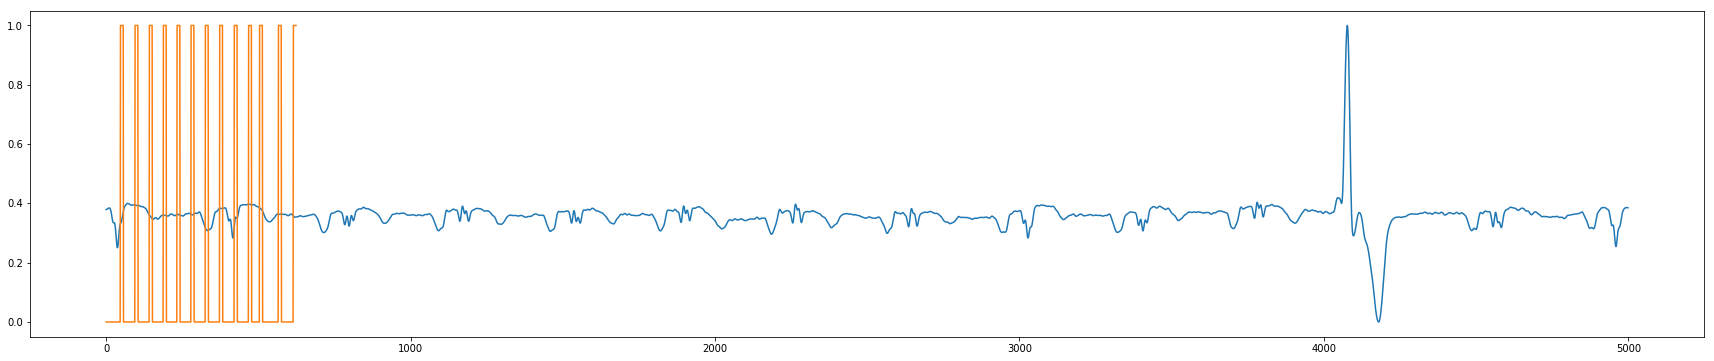

In [16]:
plt.figure(figsize=(30,6))
plt.plot(data)
plt.plot(label[:, 1])